# Lab 02: Assignment

Arkadiusz Paterak

In [11]:
import pint
from pint import Quantity
import numpy as np
import scipy.constants
import matplotlib.pyplot as plt

from typing import Callable

In [9]:
si = pint.UnitRegistry()
Q_ = si.Quantity

In [5]:
t = np.arange(0, 100, 1)

The goal of this report is to reproduce a chart presented during one of the lecture with help of Python library Pint.

The chart displays values of the solution to the Advection-Diffusion Equation (ADE) for a one-dimensional case, which is expressed as:

$$c(x, t) = \frac{M}{A} \frac{1}{2 \sqrt{\pi D}} \frac{x}{t^{3/2}} \exp\left( -\frac{(ut - x)^2}{4 D t} \right),$$

where:

- $c(x, t)$: concentration at position $x$ and time $t$ $\left[ \frac{kg}{m^3} \right]$,
- $M$: total mass of the pollutant released $\left[ kg \right]$,
- $A$: cross-sectional area of flow $\left[ m^2 \right]$,
- $D$: diffusion coefficient $\left[ \frac{m^2}{s} \right]$,
- $u$: average flow velocity $\left[ \frac{m}{s} \right]$,
- $x$: distance from the source $\left[ m \right]$,
- $t$: time $\left[ s \right]$.

In [ ]:
# Implementation of the analytical solution
def make_concentration_fn(
    M: Quantity, 
    A: Quantity, 
    D: Quantity, 
    u: Quantity
) -> Callable[[Quantity, Quantity], Quantity]:
    def concentration_fn(x: Quantity, t: Quantity) -> Quantity:
        prefactor = (M / A) * (1 / (2 * np.sqrt(np.pi * D))) * (x / t ** (3 / 2))
        exponent = np.exp(-((u * t - x) ** 2) / (4 * D * t))
        c = prefactor * exponent

        return c
    
    return concentration_fn

# Parameters with units
M = 10 * si.kg
A = 5 * si.m**2
D = 0.01 * si.m**2 / si.s
u = 0.1 * si.m / si.s
x_fixed = 50 * si.m

c = make_concentration_fn(M, A, D, u)

d:\ProgramFiles\Miniconda3\envs\ai\Lib\site-packages\pint\facets\plain\quantity.py:1033: RuntimeWarning: divide by zero encountered in divide
  return operator.truediv(a, b)
d:\ProgramFiles\Miniconda3\envs\ai\Lib\site-packages\pint\facets\plain\quantity.py:1006: RuntimeWarning: divide by zero encountered in divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)
d:\ProgramFiles\Miniconda3\envs\ai\Lib\site-packages\pint\facets\plain\quantity.py:1006: RuntimeWarning: invalid value encountered in multiply
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


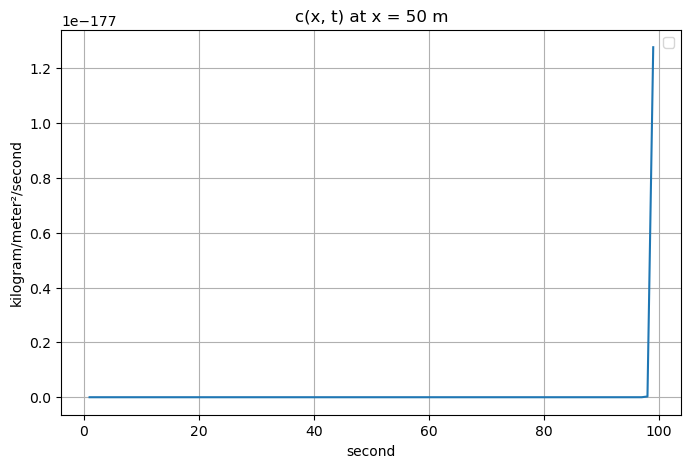

In [ ]:
t = np.arange(0, 100, 1) * si.s

si.setup_matplotlib()

plt.figure(figsize=(8, 5))
plt.plot(t, c(x_fixed, t))
plt.title('c(x, t) at x = 50 m')
plt.legend()
plt.grid(True)
plt.show()